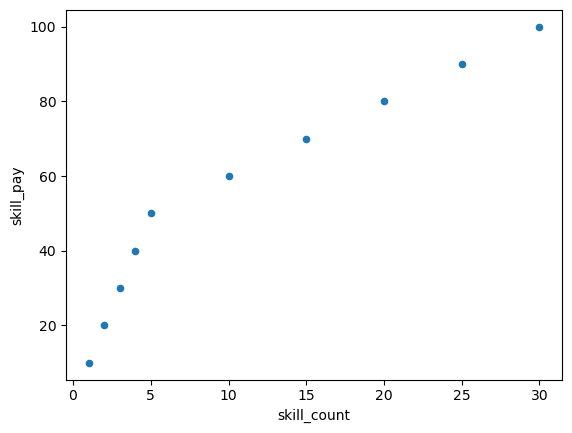

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'job_skills': ['python', 'sql', 'java', 'c++', 'c#', 'javascript', 'html', 'css', 'php', 'ruby'],
    'skill_count': [30, 25, 20, 15, 10, 5, 4, 3, 2, 1],
    'skill_pay': [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]
}

df = pd.DataFrame(data)

df.plot(kind='scatter', x='skill_count', y='skill_pay')

plt.show()


In [26]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [27]:
df = df[df['job_title_short'] == 'Data Analyst']

In [28]:
df_explode = df.explode('job_skills')

skill_stats = df_explode.groupby('job_skills').agg(
skill_count=('job_skills', 'count'),
median_salary=('salary_year_avg', 'median')
)

skills_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(20)


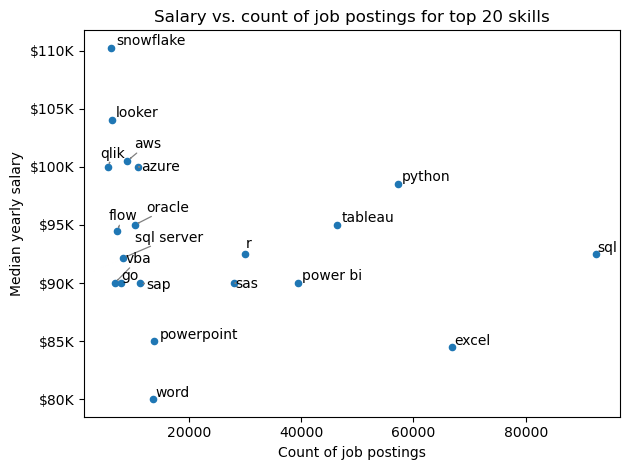

In [43]:
import matplotlib.pyplot as plt
from adjustText import adjust_text  # Ensure you have this installed: pip install adjustText




skills_stats.plot(kind='scatter', x='skill_count', y='median_salary')

texts = []

for i, txt in enumerate(skills_stats.index):
    texts.append(plt.text(skills_stats['skill_count'].iloc[i], skills_stats['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='grey', lw=0.9))


ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))


plt.xlabel('Count of job postings')
plt.ylabel('Median yearly salary')
plt.title('Salary vs. count of job postings for top 20 skills')
plt.tight_layout()
plt.show()

